학습 이미지 데이터에 변화를 줘서 더 많은 데이터를 만드는 방법을 공부해 봅시다.

train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8
train_labels <class 'numpy.ndarray'> (60000,) uint8
test_images <class 'numpy.ndarray'> (10000, 28, 28) uint8
test_labels <class 'numpy.ndarray'> (10000,) uint8


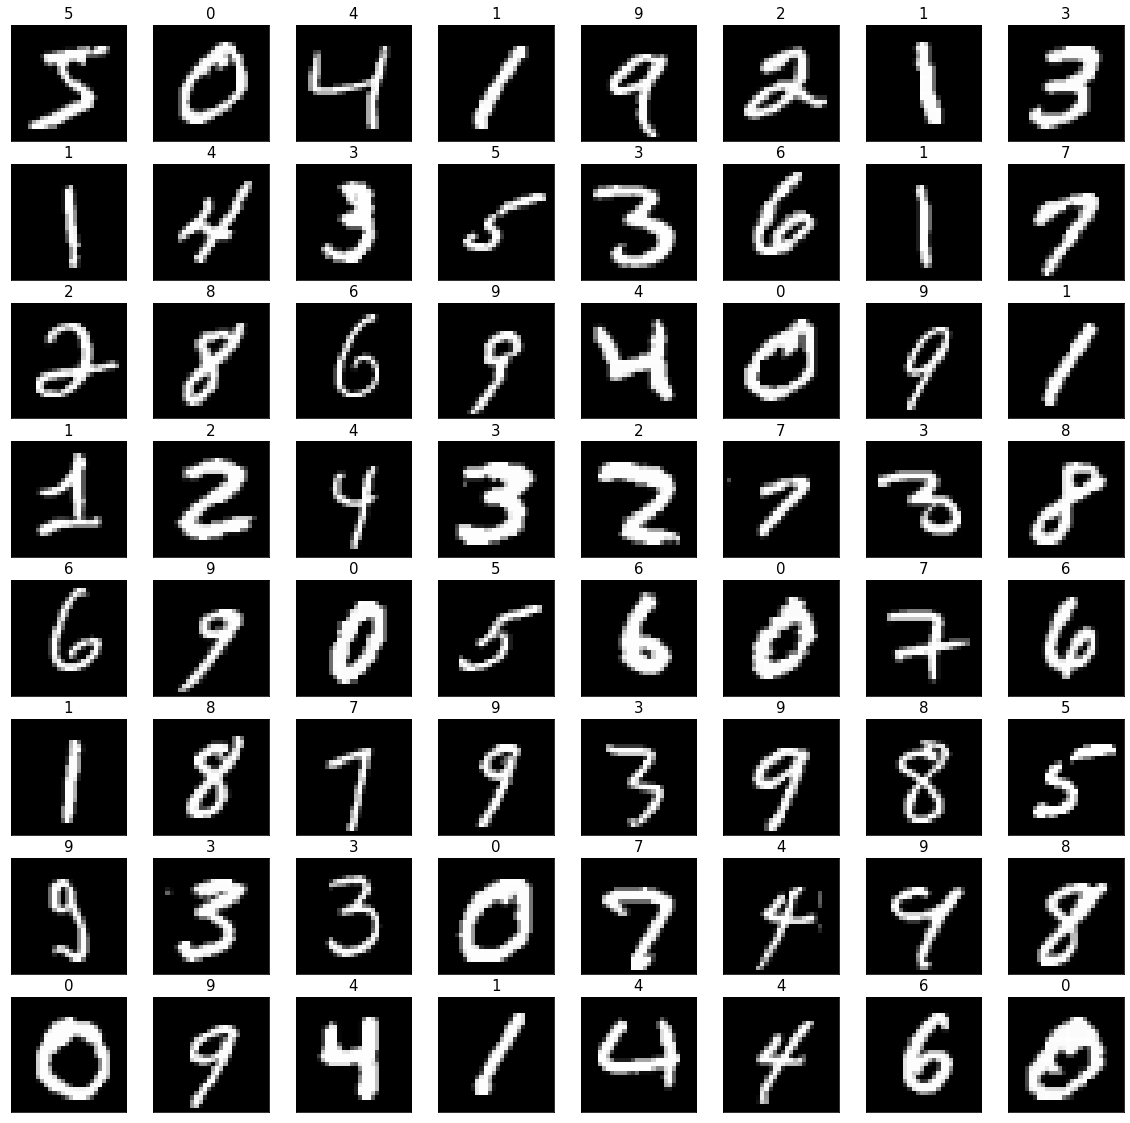

In [1]:
import tensorflow.keras as keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'train_labels', type(train_labels), train_labels.shape, train_labels.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )
print( 'test_labels', type(test_labels), test_labels.shape, test_labels.dtype )

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( train_labels[i], {'fontsize':15} )
    plt.imshow( train_images[i], cmap='gray' )

전제 학습데이터에서 5 개의 데이터만을 선택해서 이것이 우리가 가지고 있는 모든 데이터라고 생각해봅시다.

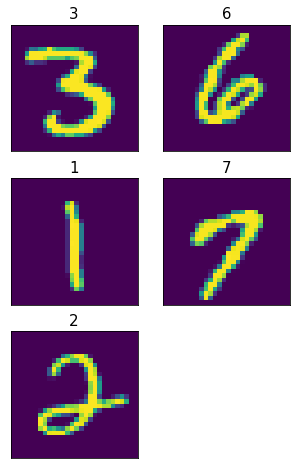

In [2]:
images = train_images[12:12+5]
labels = train_labels[12:12+5]
plt.figure( figsize=(5,8) )
for i in range(0, 5):
    plt.subplot(3,2,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( labels[i], {'fontsize':15} )
    plt.imshow( images[i] )
    
images = np.expand_dims( images, axis=-1 )

ImageDataGenerator 를 만들면서 이미지를 어떻게 변화시킬것인지를 설정합니다. 이렇게 만들어진 ImageDataGenerator 에 전체 이미지를 알려주면서 fit 을 합니다. 한번에 생성되는 데이터의 갯수를 batch_size 로 지정하고 flow 를 반환 받습니다. flow 는 iterable object 이므로 next 함수를 사용해서 다음 데이터를 받을 수 있습니다. 데이터를 한번 다 사용하는 동안에는 중복되는 출력이 없는것을 알 수 있습니다. 전체 데이터를 한번 다 사용하면 순서가 섞여지는것도 알 수 있습니다.

n = 0 : batch_x.shape = (2, 28, 28, 1)


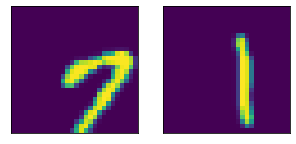

n = 1 : batch_x.shape = (2, 28, 28, 1)


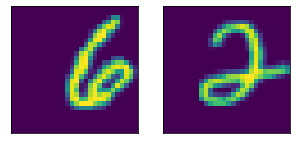

n = 2 : batch_x.shape = (1, 28, 28, 1)


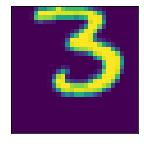

n = 3 : batch_x.shape = (2, 28, 28, 1)


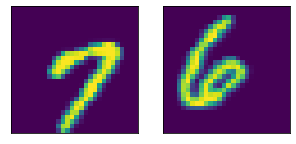

n = 4 : batch_x.shape = (2, 28, 28, 1)


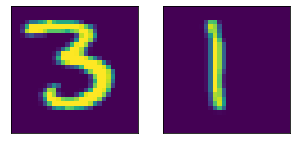

n = 5 : batch_x.shape = (1, 28, 28, 1)


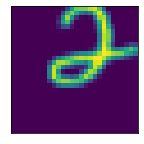

n = 6 : batch_x.shape = (2, 28, 28, 1)


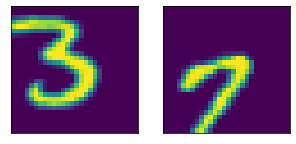

n = 7 : batch_x.shape = (2, 28, 28, 1)


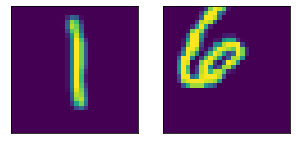

n = 8 : batch_x.shape = (1, 28, 28, 1)


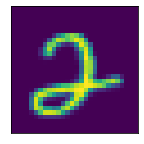

In [3]:
generator = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2,
                                                         height_shift_range=0.2 )
generator.fit(images)

batch_size = 2
flow = generator.flow( images, labels, batch_size=batch_size )

for n in range(9):
    batch_x, batch_y = next( flow )
    print( 'n =', n, ': batch_x.shape =', batch_x.shape )
    plt.figure( figsize=(5,5) )
    for i in range(batch_x.shape[0]):
        plt.subplot(1, batch_size, i+1)
        plt.xticks([]); plt.yticks([])
        plt.imshow(batch_x[i].reshape(28,28) )
    plt.show()

n = 0 : batch_x.shape = (2, 28, 28, 1)


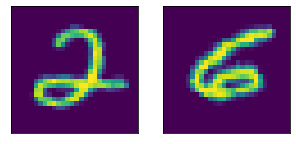

n = 1 : batch_x.shape = (2, 28, 28, 1)


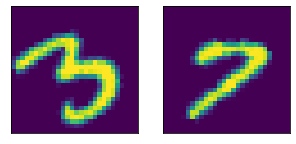

n = 2 : batch_x.shape = (1, 28, 28, 1)


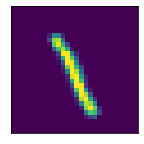

n = 3 : batch_x.shape = (2, 28, 28, 1)


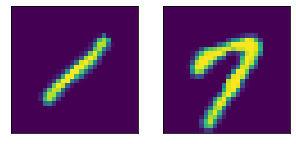

n = 4 : batch_x.shape = (2, 28, 28, 1)


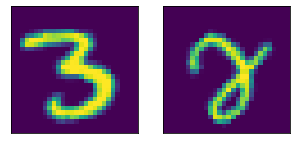

n = 5 : batch_x.shape = (1, 28, 28, 1)


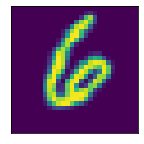

n = 6 : batch_x.shape = (2, 28, 28, 1)


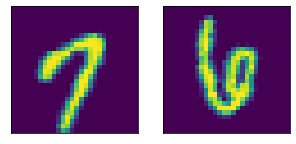

n = 7 : batch_x.shape = (2, 28, 28, 1)


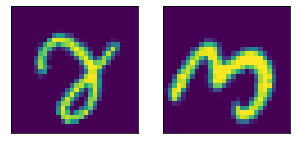

n = 8 : batch_x.shape = (1, 28, 28, 1)


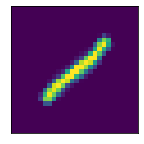

In [4]:
generator = keras.preprocessing.image.ImageDataGenerator(rotation_range=60)
generator.fit(images)

batch_size = 2
flow = generator.flow( images, labels, batch_size=batch_size )

for n in range(9):
    batch_x, batch_y = next( flow )
    print( 'n =', n, ': batch_x.shape =', batch_x.shape )
    plt.figure( figsize=(5,5) )
    for i in range(batch_x.shape[0]):
        plt.subplot(1, batch_size, i+1)
        plt.xticks([]); plt.yticks([])
        plt.imshow(batch_x[i].reshape(28,28) )
    plt.show()